In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pygplates
import pygmt
import xarray as xr
import seaborn as sns

from scipy.stats import median_abs_deviation

from gprm.datasets import Rocks, Reconstructions, Paleogeography
#from gprm import PointDistributionOnSphere
#from gprm.utils.sphere import groupby_healpix, plot_groups
from gprm.utils.raster import to_anchor_plate

import sys
#sys.path.append('../analysis')
sys.path.append('/Users/simon/OneDrive/Andes_works//python/')
import joyful_geochemistry as joy
import joyful_mapping as joymap
#import time_series as ts

%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rc('font',family='Helvetica')
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore', message='All-NaN axis encountered')


#Paleomap = Reconstructions.fetch_Scotese()
#PaleoDEM = Paleogeography.fetch_Paleomap()
import collections
from gprm import ReconstructionModel

boschman_rotation_model = ReconstructionModel('')
boschman_rotation_model.add_rotation_model('/Users/simon/GIT/bx/andes//boschman/reconstruction_model/boschman_reverse_engineered_rotations.rot')
boschman_rotation_model.add_static_polygons('/Users/simon/GIT/bx/andes//boschman/reconstruction_model/reconstructed_0.00Ma.shp')

raster_dict = {}
for reconstruction_time in np.arange(0,81,1):
    raster_dict[reconstruction_time] = '/Users/simon/GIT/bx/andes//boschman/grids/boschman_DEM_{:0.0f}Ma.nc'.format(reconstruction_time)

boschman_rasters = collections.OrderedDict(sorted(raster_dict.items()))



df = pd.read_csv('../datafiles/geochem_merge_20221026.csv')
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs=4326)
df = joy.compute_ratios(df, long_list=True)

model_dir = '../luffi/REM_surfaces_csv/'
gc_interpolator_dict = joy.make_gc_interpolator_dict(model_dir)


region = [-80,-50,-40,-10]
present_day_topography = pygmt.datasets.load_earth_relief(resolution='02m', region=region)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


pygmt-session [WARNING]: Remote dataset given to a data processing module but no registration was specified - default to gridline registration (if available)


<AxesSubplot:>

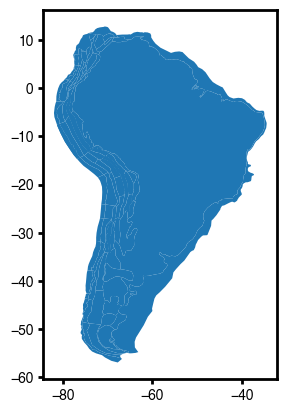

In [2]:
boschman_polygons = gpd.read_file('/Users/simon/GIT/bx/andes//boschman/reconstruction_model/reconstructed_0.00Ma.shp')
#tmp = boschman_polygons[boschman_polygons['PLATEID1']==2526]
#boschman_polygons = boschman_polygons.cx[-80:-60, -25:-10]

#boschman_polygons = boschman_polygons.dropna(subset=['NAME'])
#tmp = boschman_polygons[boschman_polygons['NAME'].str.contains('coastal|cordillera|Puna|Altiplano')]

boschman_polygons.plot()

Altiplano
GPlates-24d8ed85-d32e-4e66-b03f-fd5b176d2c6a
Number of samples after basic filtering 124
Final number of samples passed = 124
TODO implement min/max elevation cutoffs


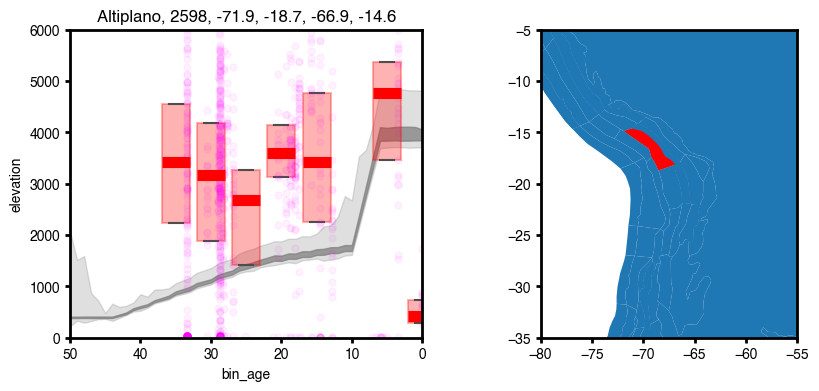

Altiplano
GPlates-23a60a2d-39b5-4346-a260-24e3dc960c94
Number of samples after basic filtering 39
Final number of samples passed = 39
TODO implement min/max elevation cutoffs


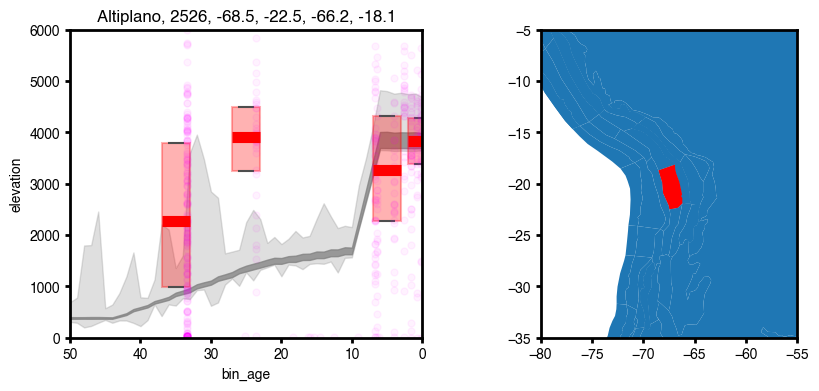

2595
GPlates-7ee2ab84-8574-4532-b63a-90bada6a1d19
Number of samples after basic filtering 36
Final number of samples passed = 36
TODO implement min/max elevation cutoffs


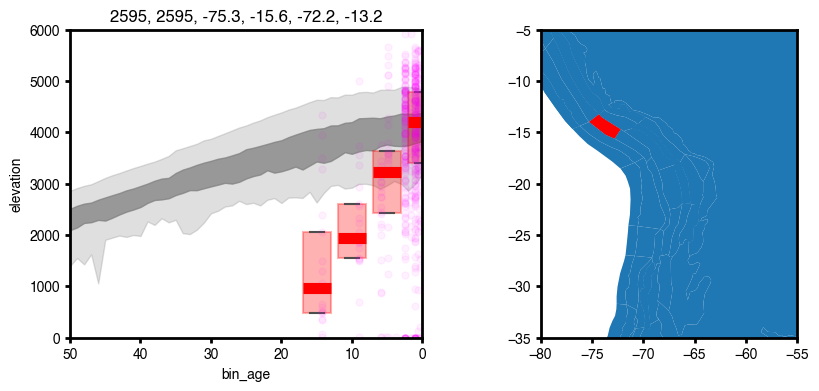

Western Cordillera
GPlates-cc221f9a-b81c-4590-929d-7ff88905fe6d
Number of samples after basic filtering 76
Final number of samples passed = 76
TODO implement min/max elevation cutoffs


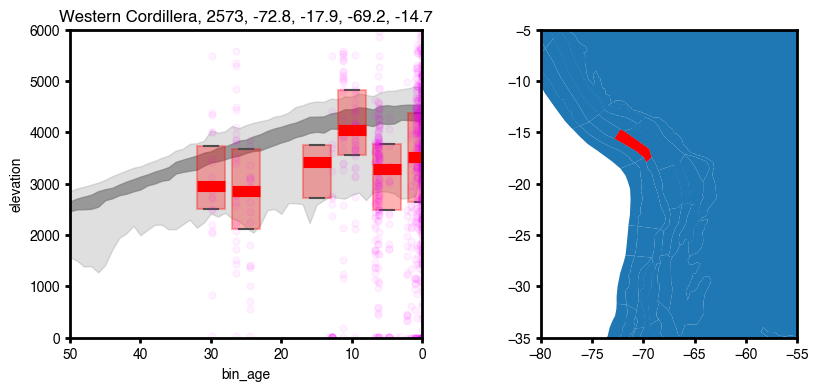

Western Cordillera
GPlates-b3771664-dd72-4e88-badb-e92f4e6dd96a
Number of samples after basic filtering 332
Final number of samples passed = 332
TODO implement min/max elevation cutoffs


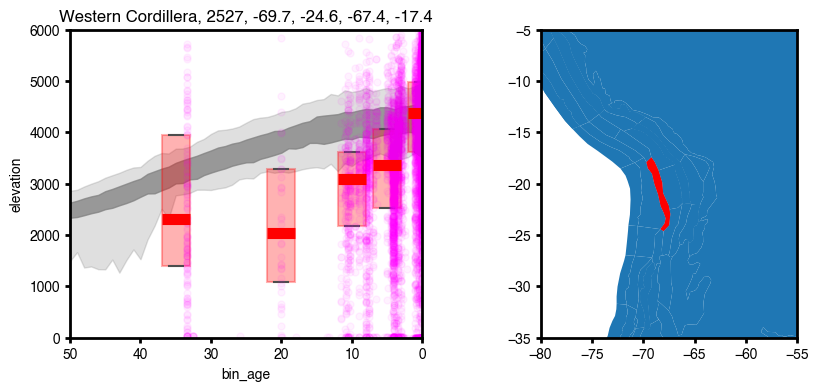

Western Cordillera
GPlates-bc8139a3-0f87-4387-a655-432aab84dea6
Number of samples after basic filtering 59
Final number of samples passed = 59
TODO implement min/max elevation cutoffs


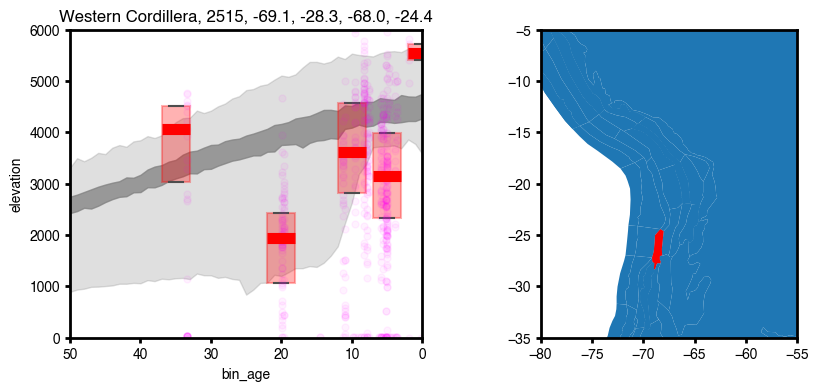

Precordillera/coastal cordillera/forearc
GPlates-79c86152-d456-445c-9639-ad48e9cae130
Number of samples after basic filtering 62
Final number of samples passed = 62
TODO implement min/max elevation cutoffs


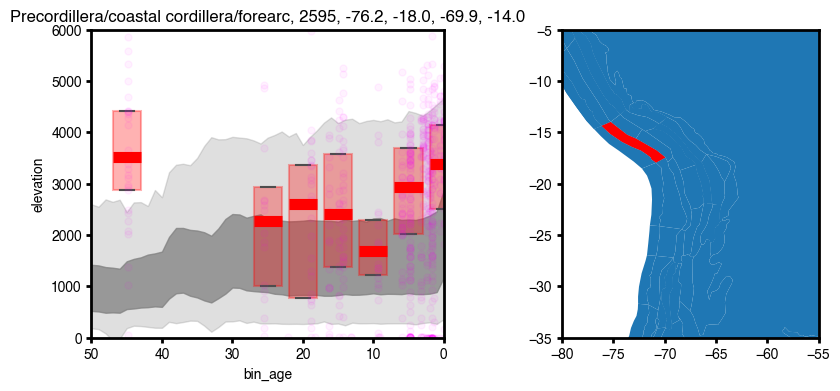

Precordillera/coastal cordillera/forearc
GPlates-6b48b619-3774-407a-93e9-f53eadd47137
Number of samples after basic filtering 151
Final number of samples passed = 151
TODO implement min/max elevation cutoffs


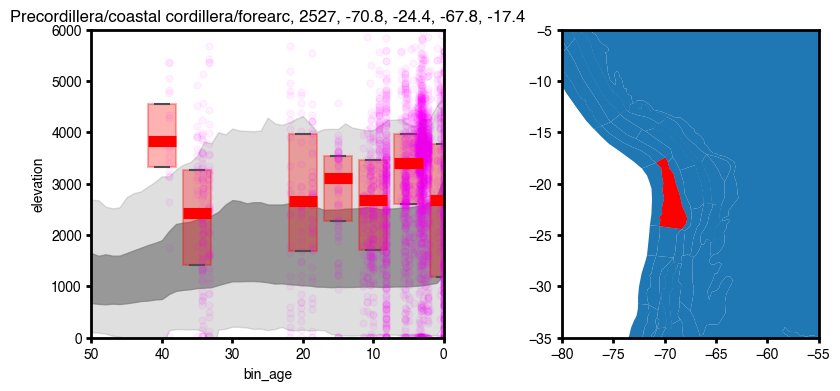

Precordillera/coastal cordillera/forearc
GPlates-22aa7316-c1b2-4940-a0ee-cd1ba8f76311
Number of samples after basic filtering 144
Final number of samples passed = 144
TODO implement min/max elevation cutoffs


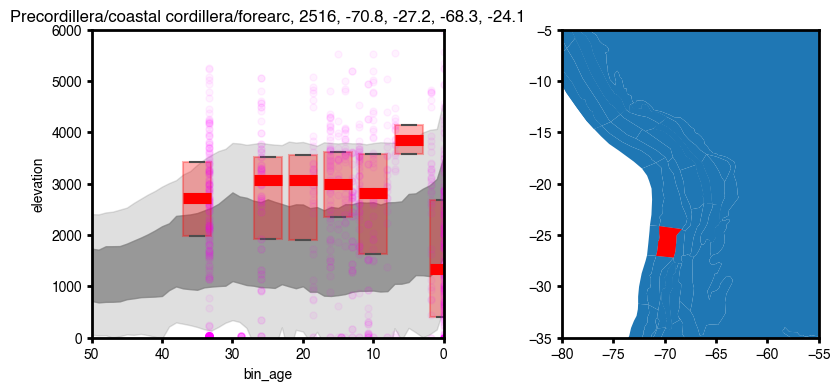

Puna
GPlates-39186b26-7fab-48cf-9752-f1ac439c1e38
Number of samples after basic filtering 164
Final number of samples passed = 164
TODO implement min/max elevation cutoffs


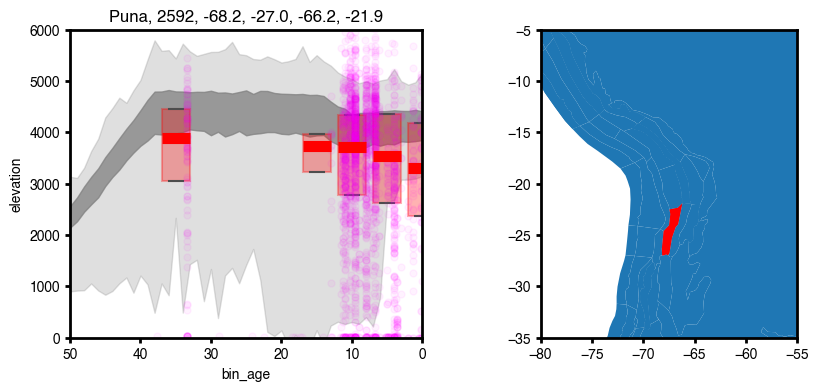

Puna
GPlates-f9464e82-d349-402e-8b5e-3df7b2e019a4
Number of samples after basic filtering 68
Final number of samples passed = 68
TODO implement min/max elevation cutoffs


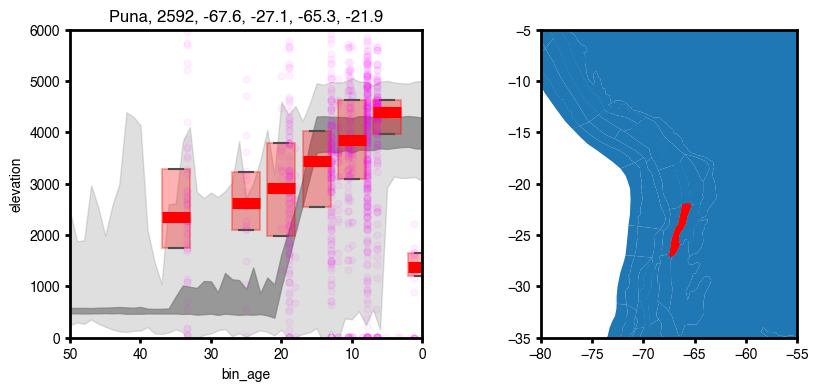

In [4]:
age_max = 50
time_bin_size = 5.
pygmt.config(GMT_VERBOSE='e')


fid_list = [
    'GPlates-79c86152-d456-445c-9639-ad48e9cae130', #2598, Coastal N 
    'GPlates-6b48b619-3774-407a-93e9-f53eadd47137', #2526, Coastal C
    'GPlates-22aa7316-c1b2-4940-a0ee-cd1ba8f76311', #2592 Coastal S
    'GPlates-7ee2ab84-8574-4532-b63a-90bada6a1d19', #2516, W Cordillera NN 
    'GPlates-cc221f9a-b81c-4590-929d-7ff88905fe6d', #2573, W Cordillera N
    'GPlates-b3771664-dd72-4e88-badb-e92f4e6dd96a', #2527, W Cordillera C 
    'GPlates-bc8139a3-0f87-4387-a655-432aab84dea6', #2515, W Cordillera S 
    'GPlates-24d8ed85-d32e-4e66-b03f-fd5b176d2c6a', #2595,  Altiplano N 
    'GPlates-23a60a2d-39b5-4346-a260-24e3dc960c94', #2527,  Altiplano S
    'GPlates-39186b26-7fab-48cf-9752-f1ac439c1e38', #Puna W
    'GPlates-f9464e82-d349-402e-8b5e-3df7b2e019a4', #Puna E
           ]

for i,p in boschman_polygons.iterrows():
    
    if not p['FEATURE_ID'] in fid_list:
        continue
    
    if p['NAME'] is None:
        p['NAME']=str(p['PLATEID1'])
    print(p['NAME'])
    print(p['FEATURE_ID'])
    
    df_filt = joy.filter_the_database(df.clip(p.geometry), 'luffi', age_min=-0.1, age_max=age_max, nans_to_zeros=False)
    elevations_df = joy.get_elevations(df_filt, gc_interpolator_dict=gc_interpolator_dict)#.join(df_filt['age'])
    
    if len(elevations_df.dropna(how='all'))<10:
        print('Fewer than 10 samples with valid elevations')
        continue
    if df_filt['age'].max()<5:
        print('No samples older than 5 Ma')
        continue
    if np.abs(df_filt['age'].max() - df_filt['age'].min())<10.:
        print('Time span of samples is less than 10 Ma')
        continue
        
    bounds = p.geometry.bounds
    try:
        (paleoDEM_stats, 
         paleoDEM_hist) = joymap.get_raster_stats_in_polygon_time_series(boschman_rasters, 
                                                                         boschman_rotation_model, 
                                                                         p,
                                                                         plate_id_to_rotate_to=p.PLATEID1,
                                                                         old_anchor_plate_id=201,
                                                                         region=[bounds[0], bounds[2], bounds[1], bounds[3]])
    except:
        print('Problem extracting raster data')
        continue
        
    elevations_df['bin_age'] = np.round(df_filt['age']/time_bin_size) * time_bin_size
    tmp_cat = []
    for col in elevations_df.columns:
        if 'elevation' in col:
            #print(elevations_df[col])
            tmp_cat.append(elevations_df[['bin_age', col]].rename(columns={col:'elevation'}).dropna())
    #tmp_cat['bin_age'] = np.round(tmp_cat['age']/time_bin_size) * time_bin_size
    tmp_cat = pd.concat(tmp_cat, ignore_index=True)
    positions = tmp_cat['bin_age'].unique()


    fig,axs = plt.subplots(ncols=2, figsize=(10,4))
    ax = axs[0]
    ax.computed_zorder = False
    #ax.contourf(paleoDEM_stats['age'], np.arange(-500,8000,100)[:-1]+50, 
    #         paleoDEM_hist, 
    #         levels=np.linspace(0,1.0001,11), cmap='gray_r', alpha=0.6,zorder=0)
    #ax.contour(paleoDEM_stats['age'], np.arange(-500,8000,100)[:-1]+50, 
    #         paleoDEM_hist, 
    #         levels=np.linspace(0,1.0001,11), colors='k', zorder=0)
    ax.fill_between(x=paleoDEM_stats['age'],
                    y1=paleoDEM_stats['min_elevation'], y2=paleoDEM_stats['max_elevation'], 
                    zorder=0, alpha=0.25, color='grey')
    ax.fill_between(x=paleoDEM_stats['age'],
                    y1=paleoDEM_stats['q25_elevation'], y2=paleoDEM_stats['q75_elevation'], 
                    zorder=0, alpha=0.75, color='grey')
    bx = sns.boxplot(
        data=tmp_cat, x="bin_age", y="elevation", color='grey', 
        whis=0,
        width=time_bin_size*0.8,
        showfliers=False,
        order=np.arange(0,350,1),
        medianprops={"linewidth": 8,
                     "solid_capstyle": "butt",
                     'color': 'red'},
        boxprops={'facecolor':'red',
                  'alpha':0.3,
                  'edgecolor':'red'}, ax=ax)
    ax.set_xticks(np.arange(0,351,50)/time_bin_size)
    for col in elevations_df.columns:
        ax.plot(df_filt.age, elevations_df[col], 'o', color='magenta', markersize=5, alpha=0.05)
    ax.set_xlim(age_max,0)
    ax.set_ylim(0,6000)
    ax.set_title('{:s}, {:d}, {:s}'.format(p['NAME'], p['PLATEID1'], ', '.join(['{:0.1f}'.format(i) for i in p.geometry.bounds])))
    boschman_polygons.plot(ax=axs[1])
    gpd.GeoDataFrame([p]).plot(color='red',ax=axs[1])
    axs[1].set_xlim(-80,-55)
    axs[1].set_ylim(-35,-5)
    plt.show()
    #break
    
#gpd.GeoDataFrame(sel).plot()
#gpd.GeoDataFrame([p]).plot()

Precordillera/coastal cordillera/forearc
GPlates-79c86152-d456-445c-9639-ad48e9cae130
Number of samples after basic filtering 62
Final number of samples passed = 62
TODO implement min/max elevation cutoffs
2595
GPlates-7ee2ab84-8574-4532-b63a-90bada6a1d19
Number of samples after basic filtering 36
Final number of samples passed = 36
TODO implement min/max elevation cutoffs
Western Cordillera
GPlates-cc221f9a-b81c-4590-929d-7ff88905fe6d
Number of samples after basic filtering 76
Final number of samples passed = 76
TODO implement min/max elevation cutoffs
Altiplano
GPlates-24d8ed85-d32e-4e66-b03f-fd5b176d2c6a
Number of samples after basic filtering 124
Final number of samples passed = 124
TODO implement min/max elevation cutoffs
Precordillera/coastal cordillera/forearc
GPlates-6b48b619-3774-407a-93e9-f53eadd47137
Number of samples after basic filtering 151
Final number of samples passed = 151
TODO implement min/max elevation cutoffs
Western Cordillera
GPlates-b3771664-dd72-4e88-badb-e92f

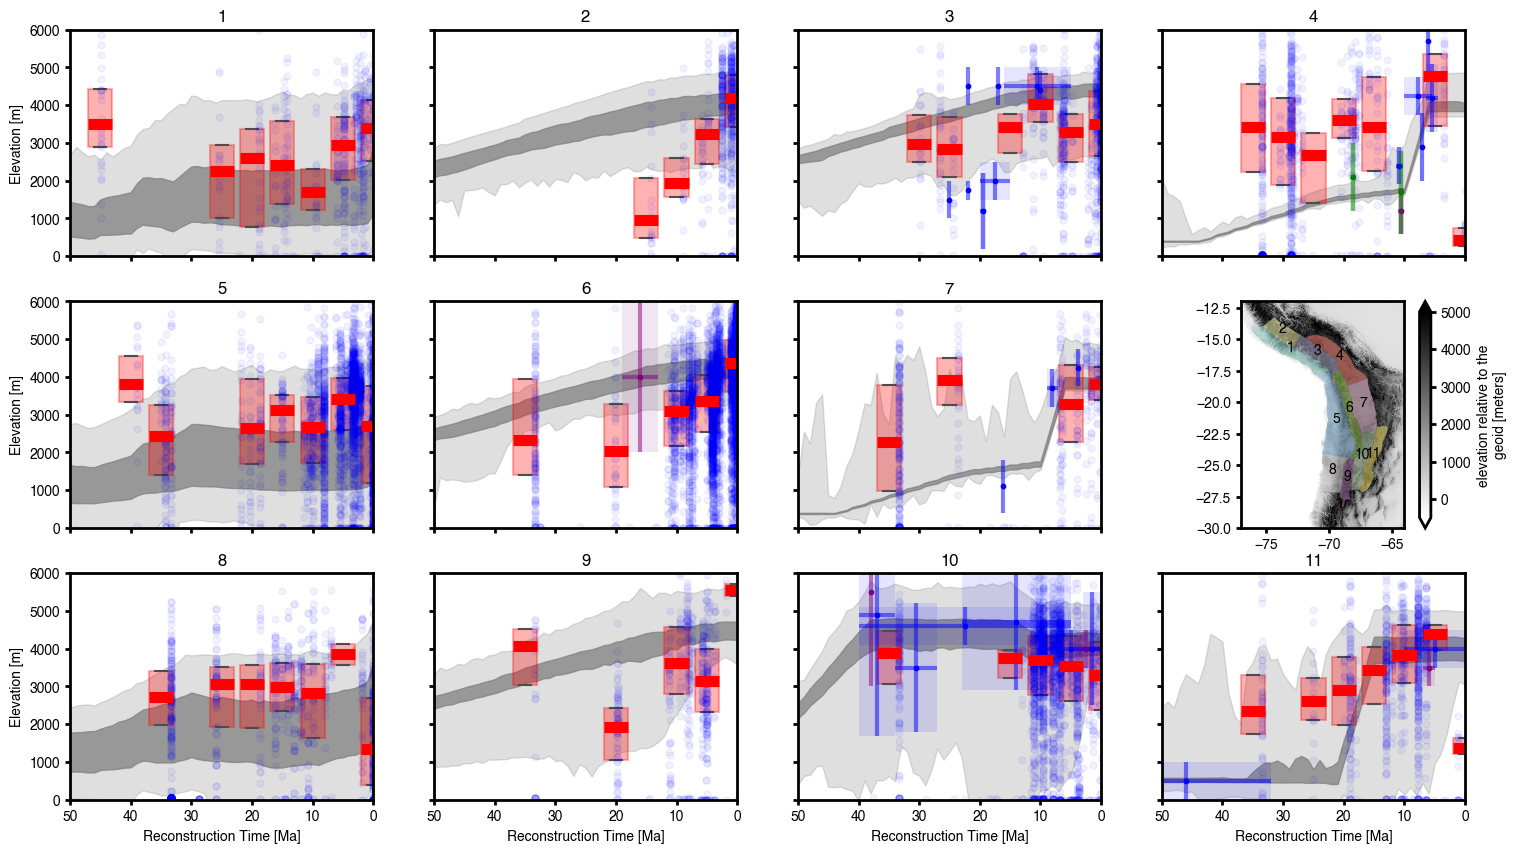

In [7]:
fid_list = [
    'GPlates-79c86152-d456-445c-9639-ad48e9cae130', #2598, Coastal N 
    'GPlates-7ee2ab84-8574-4532-b63a-90bada6a1d19', #2516, W Cordillera NN 
    'GPlates-cc221f9a-b81c-4590-929d-7ff88905fe6d', #2573, W Cordillera N
    'GPlates-24d8ed85-d32e-4e66-b03f-fd5b176d2c6a', #2595,  Altiplano N 

    'GPlates-6b48b619-3774-407a-93e9-f53eadd47137', #2526, Coastal C
    'GPlates-b3771664-dd72-4e88-badb-e92f4e6dd96a', #2527, W Cordillera C 
    'GPlates-23a60a2d-39b5-4346-a260-24e3dc960c94', #2527,  Altiplano S

    'GPlates-22aa7316-c1b2-4940-a0ee-cd1ba8f76311', #2592 Coastal S
    'GPlates-bc8139a3-0f87-4387-a655-432aab84dea6', #2515, W Cordillera S 
    'GPlates-39186b26-7fab-48cf-9752-f1ac439c1e38', #Puna W
    'GPlates-f9464e82-d349-402e-8b5e-3df7b2e019a4', #Puna E
           ]

fig,axs = plt.subplots(nrows=3, ncols=4, figsize=(18,10))

ps = []
axs = axs.reshape(-1)
for i,(fid,ax) in enumerate(zip(fid_list, np.delete(axs, 7))):
    
    p = boschman_polygons[boschman_polygons['FEATURE_ID']==fid].iloc[0]
    ps.append(p)
    
    if p['NAME'] is None:
        p['NAME']=str(p['PLATEID1'])
    print(p['NAME'])
    print(p['FEATURE_ID'])
    
    df_filt = joy.filter_the_database(df.clip(p.geometry), 'luffi', age_min=-0.1, age_max=age_max, nans_to_zeros=False)
    elevations_df = joy.get_elevations(df_filt, gc_interpolator_dict=gc_interpolator_dict)#.join(df_filt['age'])
    
    if len(elevations_df.dropna(how='all'))<10:
        print('Fewer than 10 samples with valid elevations')
        continue
    if df_filt['age'].max()<5:
        print('No samples older than 5 Ma')
        continue
    if np.abs(df_filt['age'].max() - df_filt['age'].min())<10.:
        print('Time span of samples is less than 10 Ma')
        continue
        
    bounds = p.geometry.bounds
    try:
        (paleoDEM_stats, 
         paleoDEM_hist) = joymap.get_raster_stats_in_polygon_time_series(boschman_rasters, 
                                                                         boschman_rotation_model, 
                                                                         p,
                                                                         plate_id_to_rotate_to=p.PLATEID1, 
                                                                         old_anchor_plate_id=201,
                                                                         spacing=0.1,
                                                                         region=[bounds[0], bounds[2], bounds[1], bounds[3]])
    except:
        print('Problem extracting raster data')
        continue
        
    elevations_df['bin_age'] = np.round(df_filt['age']/time_bin_size) * time_bin_size
    tmp_cat = []
    for col in elevations_df.columns:
        if 'elevation' in col:
            #print(elevations_df[col])
            tmp_cat.append(elevations_df[['bin_age', col]].rename(columns={col:'elevation'}).dropna())
    #tmp_cat['bin_age'] = np.round(tmp_cat['age']/time_bin_size) * time_bin_size
    tmp_cat = pd.concat(tmp_cat, ignore_index=True)
    positions = tmp_cat['bin_age'].unique()

    #sel.append(p)

    #fig,axs = plt.subplots(ncols=2, figsize=(10,4))
    #ax = axs[i]
    ax.computed_zorder = False
    #ax.contourf(paleoDEM_stats['age'], np.arange(-500,8000,100)[:-1]+50, 
    #         paleoDEM_hist, 
    #         levels=np.linspace(0,1.0001,11), cmap='gray_r', alpha=0.6,zorder=0)
    #ax.contour(paleoDEM_stats['age'], np.arange(-500,8000,100)[:-1]+50, 
    #         paleoDEM_hist, 
    #         levels=np.linspace(0,1.0001,11), colors='k', zorder=0)
    ax.fill_between(x=paleoDEM_stats['age'],
                    y1=paleoDEM_stats['min_elevation'], y2=paleoDEM_stats['max_elevation'], 
                    zorder=0, alpha=0.25, color='grey')
    ax.fill_between(x=paleoDEM_stats['age'],
                    y1=paleoDEM_stats['q25_elevation'], y2=paleoDEM_stats['q75_elevation'], 
                    zorder=0, alpha=0.75, color='grey')
    bx = sns.boxplot(
        data=tmp_cat, x="bin_age", y="elevation", color='grey', 
        whis=0,
        width=time_bin_size*0.8,
        showfliers=False,
        order=np.arange(0,350,1),
        medianprops={"linewidth": 8,
                     "solid_capstyle": "butt",
                     'color': 'red'},
        boxprops={'facecolor':'red',
                  'alpha':0.3,
                  'edgecolor':'red'}, ax=ax)
    ax.set_xticks(np.arange(0,351,50)/time_bin_size)
    for col in elevations_df.columns:
        ax.plot(df_filt.age, elevations_df[col], 'o', color='blue', markersize=5, alpha=0.05)
    ax.set_xlim(age_max,0)
    ax.set_ylim(0,6000)
    #ax.set_title('{:s}, {:d}, {:s}'.format(p['NAME'], p['PLATEID1'], ', '.join(['{:0.1f}'.format(i) for i in p.geometry.bounds])))
    #ax.set_title('{:s}'.format(p['NAME']))
    ax.set_title('{:d}'.format(i+1))
    
    if i>6:
        ax.set_xlabel('Reconstruction Time [Ma]')
    else:
        ax.set_xlabel('')
        ax.set_xticklabels('')
        
    if i in [0,4,7]:
        ax.set_ylabel('Elevation [m]')
    else:
        ax.set_ylabel('')
        ax.set_yticklabels('')
        
    if fid in df_Boschman.dropna(subset='Polygon_ID').Polygon_ID.unique():
        subset = df_Boschman.query('Polygon_ID == @fid')
        add_error_boxes(ax, subset)
                                           
#boschman_polygons.plot(ax=axs[1])
ax = axs[7]
polys = gpd.GeoDataFrame.from_records(ps)
present_day_topography.plot(ax=ax, zorder=0, cmap='gray_r', vmin=-500, vmax=5000)
polys['label'] = np.arange(1,len(ps)+1)
polys.plot(cmap='Set3', ax=ax, alpha=0.5)
polys.apply(lambda x: ax.annotate(text=x['label'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);
ax.set_xlim(-77,-64)
ax.set_ylim(-30,-12)
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()


In [6]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='None', alpha=0.5):

    # Create list for all the error patches
    errorboxes = []

    # Loop over data points; create box from errors at each point
    for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T):
        rect = Rectangle((x - xe, y - ye), xe*2, ye*2)
        errorboxes.append(rect)

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    
def add_error_boxes(ax, subset):

    for method in method_dictionary:
        subsubset = subset[subset['Method Category']==method]
        x=(subsubset['Age_min']+subset['Age_max'])/2
        y=(subsubset['Elevation_min']+subset['Elevation_max'])/2
        xerr=(subset['Age_max']-subset['Age_min'])/2
        yerr=(subset['Elevation_max']-subset['Elevation_min'])/2

        ax.plot(x, y, '.', color=method_dictionary[method], label=method)
        ax.errorbar(x, y, xerr=xerr, yerr=yerr, elinewidth=3, alpha=0.5,
                    fmt='.', color=method_dictionary[method])

        make_error_boxes(ax, np.array(x), np.array(y), np.array(xerr), np.array(yerr), 
                         facecolor=method_dictionary[method], alpha=0.1)
    
    
    
df_Boschman = pd.read_excel('~/OneDrive/Andes_works/datafiles/Boschman_compilation.xlsx', sheet_name='Sheet1')

df_Boschman.dropna(subset=['Age_max'], inplace=True)

df_Boschman['Method Category'].fillna(value='miscellaneous', inplace=True)

method_dictionary = {'stratigraphy': 'orange', 
                     'miscellaneous': 'purple', 
                     'isotope paleoaltimetry': 'blue',
                     'paleobotany/fossil leaf physiognomy': 'green'}

print(df_Boschman.Domain.unique())
print(df_Boschman.Polygon_ID.unique())

['Western Cordillera - C' 'Altiplano - C' 'Eastern Puna - C'
 'Western Puna - C' 'Puna - C' 'Estern Puna - C' 'Eastern Cordillera - C']
[nan 'GPlates-cc221f9a-b81c-4590-929d-7ff88905fe6d'
 'GPlates-b3771664-dd72-4e88-badb-e92f4e6dd96a'
 'GPlates-24d8ed85-d32e-4e66-b03f-fd5b176d2c6a'
 'GPlates-23a60a2d-39b5-4346-a260-24e3dc960c94'
 'GPlates-f9464e82-d349-402e-8b5e-3df7b2e019a4'
 'GPlates-39186b26-7fab-48cf-9752-f1ac439c1e38']
